# Pigs Style Game Competition

## Educators Note - Rational for this guided student task.

The plan !!  Get the students to do some strategies for the "intro to python" course they get in term 1. I write a shiny app that they submit the strategies to the "competion" code and the overall winner gets a prize.

In term 2 for STOR-609, they write the "competition" code (as badly as possible), swap solutions, and rewrite wrt the 5Rs.

I then introduce "patterns". They then improve there own code for th strategies and the competition from previous exercise using patterns, present it, and report on how the 5Rs  have been improved by use of patterns and other things. 

## Strategy Type

$Strategy : {N} \times N \times N \rightarrow Bool$

### Example 1 - stick at 10

In [1]:
def stick_at_10(score,opponent_score,running_total) :
    return True if running_total < 10 else False 

### Example 2 - stick at 15

In [2]:
def stick_at_15(score,opponent_score,running_total) :
    return True if running_total < 15 else False 

### Example 3 - a parameterised strategy - target n stick at m

In [3]:
def target_n_stick_at_m(score,opponent_score,running_total,n,m) :
    return True if running_total < m else False 

Note that the above has type $N \times N \times N \times N \times N \rightarrow Bool$ so is not of type $Strategy$. However, currying (a standard design pattern) of the strategies parameter n results in the required $Strategy$ type _i.e_. $N \times N \times N \times N \rightarrow Bool$

Also note the need to swap the parameter order. Contrast / compare the use of curry to partial application

In [4]:
from pymonad.tools import curry

In [5]:
@curry(5)
def target_n_stick_at_m(n,m,score,opponent_score,running_total) :
    return True if running_total < m else False 

In [6]:
target_100_stick_at_10 = target_n_stick_at_m(100,10)

## Basic Turn Type

$Turn : Strategy \times N \times N \rightarrow N$

In [7]:
import random

In [8]:
def basic_pigs_turn(a,ascore,bscore) :
    running_total = 0
    while a(ascore,bscore,running_total) :
        roll = random.randint(1,6)
        if roll == 6 :
            return ascore
        running_total += roll
    return running_total 

### Educators Note - point of departure

Clearly, the fixed parameter values in this method shout out for abstraction, perhaps via a dice type (?). However, a big education point here is the random, and hence non-pure, nature of the function. This can be a "point of departure". Dont forget to point out the failure of memoisation of a non pure function. Also - see the idea sketched out below. 

#### Point of departure

An obvious abstraction is 

$Dice : () \rightarrow N$

which could lead to a parameterised dice function suction as 

In [9]:
def dice(sides) :
    return random.randint(1,sides)

All well and good, but the next step is the non-pure nature of this type (remember, a function with no arguments is a constant). Now get students to consider the type

$Dice : N  \rightarrow N \times N$

and the function

In [10]:
import sys

def dice(seed,sides) :
    random.seed(seed)
    return (random.randint(0,sys.maxsize),random.randint(1,sides))

In [11]:
seed = 0
(seed,value) = dice(seed,6)

In [12]:
from functools import partial
seed = 0
D6 = partial(dice,sides = 6)
(seed,value) = D6(seed)

This approach still has a number of issues - but it sets sail a whole ship of discovery and discussion. If time / ability permit, get the students to study this example ...

In [13]:
def diceClass(sides,seed) : # remember - a class is just function that returns an object
    def dice() : # the object produced by the class - remember, an object is just a function with memory
        nonlocal seed # the objects memory
        random.seed(seed)
        seed = random.randint(0,sys.maxsize) # note - python 3 specific
        dice = diceClass(sides,seed) # notice the reference to the enclosing function
        return dice,random.randint(1,sides)
    return dice
        

In [14]:
D6 = diceClass(6,0)
D10 = diceClass(10,5)

In [15]:
for i in range(10) :
    D6,value = D6()
    print("D6 gives : " + str(value))

D6 gives : 4
D6 gives : 6
D6 gives : 2
D6 gives : 4
D6 gives : 6
D6 gives : 3
D6 gives : 3
D6 gives : 1
D6 gives : 1
D6 gives : 2


In [16]:
for i in range(10) :
    D10,value = D10()
    print("D10 gives : " + str(value))

D10 gives : 6
D10 gives : 9
D10 gives : 7
D10 gives : 3
D10 gives : 8
D10 gives : 1
D10 gives : 5
D10 gives : 2
D10 gives : 8
D10 gives : 7


Repeat - but interleaved !! 

In [17]:
D6 = diceClass(6,0)
D10 = diceClass(10,5)
for i in range(10) :
    D6,value = D6()
    print("D6 gives : " + str(value))
    D10,value = D10()
    print("D10 gives : " + str(value))
    

D6 gives : 4
D10 gives : 6
D6 gives : 6
D10 gives : 9
D6 gives : 2
D10 gives : 7
D6 gives : 4
D10 gives : 3
D6 gives : 6
D10 gives : 8
D6 gives : 3
D10 gives : 1
D6 gives : 3
D10 gives : 5
D6 gives : 1
D10 gives : 2
D6 gives : 1
D10 gives : 8
D6 gives : 2
D10 gives : 7


#### Notes

1) Could you implement the diceClass using python classes ? 
2) Remove the comments from the diceClass function and see if the students recognise the class / object patterns.
3) Do the students see the significance of the interleaving example ? It shows that dice objects are thread safe
4) Can the dice objects be memoised ? Are they pure ? Can the students use their memoise functions from the exercises in the patterns section to memoise the dice objets ?

### End of Point of Departure

## A more declarative Turn

### Educators Note - discussion opportunity

Take this opportunity to ensure that the concept _declarative_ is understood
and contrast it to _imperative_. Why is the following design for the type $Turn$ more declarative than the former.

Point for discussion - is moving from imperative to declarative code part of the process of abstraction ?

The diceClass can now be used in the turn function.

$Turn : Dice \times Strategy \times N \times N \rightarrow N$

In [18]:
def pigs_turn(dice,strategy,score,opponent_score) :
    running_total = 0
    while strategy(score,opponent_score,running_total) :
        dice,roll = dice()
        if roll == 1 :
            return score
        running_total += roll
    return running_total 

#### Example 

In [19]:
strategy = target_n_stick_at_m(100,10)
dice = diceClass(sides = 6,seed = 0)

In [20]:
pigs_turn(dice,strategy,0,0)

10

## A Game Type

Start with

$Game : Dice \times N \times Turn \times Strategy \times Strategy \times N \times N \rightarrow Strategy$

In [21]:
def game(dice,target,turn,a,b,ascore = 0,bscore = 0) :
    ascore += turn(dice,a,ascore,bscore)
    if ascore > target :
        return a
    bscore += turn(dice,b,bscore,ascore)
    if bscore > target :
        return b
    return game(dice,target,turn,a,b,ascore,bscore)

#### Example

In [22]:
a = target_n_stick_at_m(100,20)
b = target_n_stick_at_m(100,20)

In [23]:
dice = diceClass(sides = 6,seed = 0)
res = game(dice,100,pigs_turn,a,b)

In [24]:
astat = 0
bstat = 0
for i in range(100) :
    res = game(dice,100,pigs_turn,a,b)
    if res == a :
        astat += 1
    else :
        bstat += 1

In [25]:
bstat

38

## An alternative Game type

The previous $Game$ type included $Strategy$ "(ies)". Here is an alternative.

$Game : Dice \times N \times Turn \rightarrow (Strategy \times Strategy \times N \times N \rightarrow Strategy)$

Note that $Game$ now constitutes a class (it is a function returning a function). What is the corresponding object ? What is the objects type ?

What about the initial scores of the game ? Are they free to choose ? Assume not, then is it appropriate to specify them as part of the type of the object returned by a $Game$ type ? Can this be avoided ?  For example is 

$Game : Dice \times N \times Turn \rightarrow (Strategy \times Strategy \rightarrow Strategy)$

an appropriate type for $Game$ ? Let's see.


In [26]:
def game(dice,target,turn) :
    def object(a,b,ascore = 0,bscore = 0) :
        ascore += turn(dice,a,ascore,bscore)
        if ascore > target :
            return a
        bscore += turn(dice,b,bscore,ascore)
        if bscore > target :
            return b
        return object(a,b,ascore,bscore)
    return object

Using this type (abstraction ?) the starting parameters can hidden in a very natural manner from the interface by tying them to the object. This links with the idea that classes can hide implementation details in the corresponding object.

#### Example

In [27]:
a = target_n_stick_at_m(100,20)
b = target_n_stick_at_m(100,20)

In [28]:
dice = diceClass(sides = 6,seed = 0)
agame = game(dice,100,pigs_turn)

In [29]:
astat = 0
bstat = 0
for i in range(100) :
    if agame(a,b) == a :
        astat += 1
    else :
        bstat += 1

## A Round Type

$Round : Game \times N \rightarrow (Strategy \times Strategy \rightarrow \left[Strategy\right])$

In [30]:
def round(game,rounds) :
    def object(a,b) :
        awins =  sum([game(x,y) == a for x,y in [(a,b)]*rounds])
        return (awins,rounds - awins)
    return object

#### Example

In [31]:
round(agame,200)(a,b)

(130, 70)

## A Competition type

$Competition : Round \times \left\{Strategy\right\} \rightarrow (Strategy \times Strategy \rightarrow N \times N) $

In [32]:
from itertools import product

In [33]:
def competition(round,strategies) :
    return {(a,b) : round(a,b) for a,b in product(strategies,strategies)}

#### Example

In [34]:
around = round(agame,200)
res = competition(around,{a,b})

In [35]:
res[(b,a)]

(126, 74)

## Example 

In [36]:
strategy_map = {target_n_stick_at_m(100,i) : i for i in range(1,31)}
strategies = set(strategy_map.keys())
dice = diceClass(sides = 6,seed = 0)
agame = game(dice,100,pigs_turn)
around = round(agame,200)
res = competition(around,strategies)

In [37]:
tab = {(strategy_map[a],strategy_map[b]) : scores for (a,b),scores in res.items()}



In [38]:
import numpy as np
import seaborn

<Axes: >

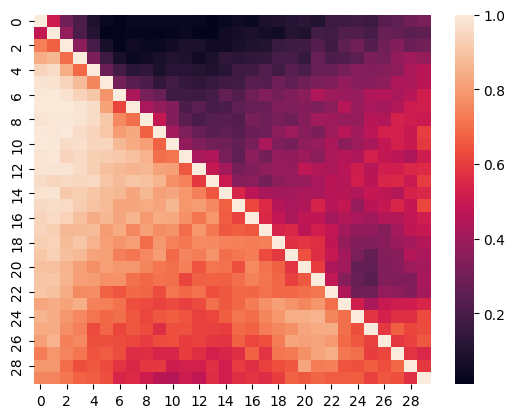

In [39]:
arr = np.empty((30,30))
for (a,b),(ascore,bscore) in tab.items() :
    arr[a-1,b-1] = ascore/(ascore+bscore)
seaborn.heatmap(arr)

In [40]:
import numpy as np
from plotly.offline import plot

z = arr
data = [{'x': list(range(1,30)),
         'y': list(range(1,30)),
         'z': arr,
         'type': 'surface'}]

plot({'data': data})


'temp-plot.html'

# Notes

Dice book - need to make a bibtex entry

@BOOK{Knizia2010-ez,
  title     = "Dice games properly explained",
  author    = "Knizia, Reiner",
  publisher = "Blue Terrier Press",
  month     =  jan,
  year      =  2010
}






